<a href="https://colab.research.google.com/github/cltgoutham/Capstone-4-Book-Recommendation-System/blob/main/Goutham_Raj_Unsupervised_ML_Project_Book_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised ML Project**    - **Book Recommendation System**



##### **Project Type**    - Unsupervised Machine Learning
##### **Project Title**   - Book Recommendation System
##### **Contribution**    - Individual
##### **Created By**  - Goutham Raj


# **Project Summary -**

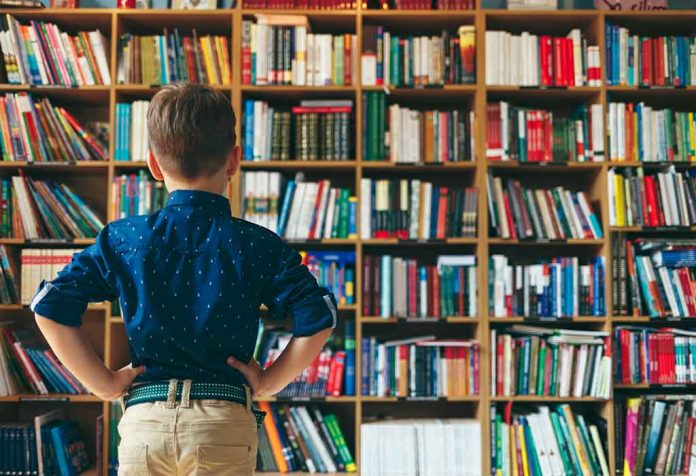

Recommender Systems are algorithms aimed at suggesting relevant items to users. Items can be books, movies to watch, text to read, products to buy, or anything else depending on industries.

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys. In a very general way, Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.

In this project our aim is to build a book recommendation system using unsupervised machine learning techniques.For this project we will be using the following datasets:


1. Users:

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

2. Books:

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

3. Ratings:

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The goal of this project is to develop a book recommendation system that provides personalized recommendations to users based on their preferences and interests. The system should take into account various factors such as the user's reading history, genre preferences, ratings, and other relevant information to generate accurate and relevant book recommendations.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

This contains 3 Datasets.

In [ ]:
# Loading 3 Datasets
books = pd.read_csv('/content/drive/MyDrive/Almabetter/ Project 4- Unsupervised /CSV files/Books.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Almabetter/ Project 4- Unsupervised /CSV files/Ratings.csv')
users = pd.read_csv('/content/drive/MyDrive/Almabetter/ Project 4- Unsupervised /CSV files/Users.csv')

<ipython-input-3-9532b50f5de5>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/drive/MyDrive/Almabetter/ Project 4- Unsupervised /CSV files/Books.csv')


### Dataset First View

In [ ]:
# Dataset First Look - books dataset
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# Dataset First Look - ratings dataset
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# Dataset First Look - users dataset
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Rows and Column count of Book dataset : ",books.shape)
print(f"Rows and Column count of Ratings dataset : ",ratings.shape)
print(f"Rows and Column count of Users dataset : ",users.shape)

Rows and Column count of Book dataset :  (271360, 8)
Rows and Column count of Ratings dataset :  (1149780, 3)
Rows and Column count of Users dataset :  (278858, 3)


### Dataset Information

In [ ]:
# Dataset Info - Book dataset
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
# Dataset Info - Ratings dataset
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
# Dataset Info -Users dataset
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count- Books dataset
books.duplicated().sum()

0

In [ ]:
# Dataset Duplicate Value Count- Users dataset
users.duplicated().sum()

0

In [ ]:
# Dataset Duplicate Value Count- Ratings dataset
ratings.duplicated().sum()

0

* There is no duplicate values present in the dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count - Books dataset
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

* In books dataset there are missing values present in Book-Author, Publisher,
Image-URL-L columns, but in a negligible rate.

In [ ]:
# Missing Values/Null Values Count - Ratings dataset
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
# Missing Values/Null Values Count - Users dataset
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

* There is a large amount of values missing in the Age column.

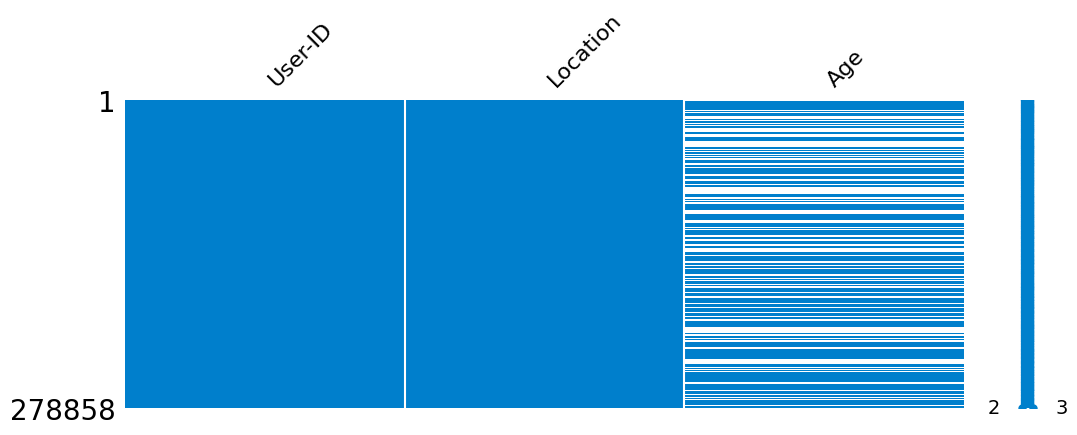

In [ ]:
# Visualizing the missing values- Users dataset
msno.matrix(users, color= (0, 0.5, 0.8), figsize= (12,4))
plt.show()

### What did you know about your dataset?

*   There are 3 Dataset, which are Books, Ratings and Users.
*   Books dataset contains 271360 rows and 9 columns, Ratings dataset contains 1149780 rows and 3 columns, users dataset consists of 278858 rows and 3 columns.


*   There are no duplicate values in the dataset.
*   There are missing values in Books and Users dataset.





## ***2. Understanding Your Variables***

###2.1.Dataset Columns

In [ ]:
# Dataset Columns-
print("Book Dataset Columns : ", list(books.columns))
print("\n\nRating Dataset Columns : ", list(ratings.columns))
print("\n\nUsers Dataset Columns : ", list(users.columns))

Book Dataset Columns :  ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


Rating Dataset Columns :  ['User-ID', 'ISBN', 'Book-Rating']


Users Dataset Columns :  ['User-ID', 'Location', 'Age']


###2.2.Dataset Describe

In [ ]:
# Dataset Describe- Books dataset
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [ ]:
# Dataset Describe- Ratings dataset
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [ ]:
# Dataset Describe- Users dataset
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


###2.3 Check Unique Values for each variable.

####Books dataset

In [ ]:
# Check Unique Values for each variable.
print("Number of unique values for each variable.")
print(books.nunique())
print("\n\nRows and Column count : ", books.shape)

Number of unique values for each variable.
ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64


Rows and Column count :  (271360, 8)




*   For each book ISBN number will be unique.
*   For 271360 ISBN we can see that there are 242135 unique book titles, which means there can be multiple books with same book title.



In [ ]:
# Group the books by title and count the occurrences
book_counts = books.groupby('Book-Title').size().reset_index(name='Count')

# Filter the books with more than one occurrence
common_books = book_counts[book_counts['Count'] > 1]

# Display the common books
print(common_books)

                                               Book-Title  Count
41                              !%@ (A Nutshell handbook)      2
59      'A Hell of a Place to Lose a Cow': An American...      2
78                                           'Salem's Lot      3
113                                     ...And Now Miguel      2
176                     1,003 Great Things About Teachers      2
...                                                   ...    ...
241937  \Surely You're Joking, Mr. Feynman!\": Adventu...      2
241981   \Yes\" or \"No\": The Guide to Better Decisions"      2
241983  \You're Okay, It's Just a Bruise\": A Doctor's...      2
242013  dot.bomb: My Days and Nights at an Internet Go...      3
242125              Ã?Â?berleben in der WÃ?Â¼ste Danakil.      2

[19907 rows x 2 columns]


In [ ]:
books.shape

(271360, 8)

In [ ]:
#droping those duplicate books
#books.drop_duplicates(subset='Book-Title', keep='first', inplace=True)



*   ISBN shows that there are 271360 unique books.

*   We can see that there are multiple books with same Title.
*   But the ISBN numbers are different because ISBN number changes if the Year_Of_Publication, version of the book or Publishing Companies changes.


*   So we are not deleting these books saying they are Duplicates.
*   When we consider unique number of books, we have 242135 unique books.
*   102023 Authors are present in the dataset.
*   We have 202 unique values in the "Year-of-Publication" column.


*   16807 unique publishers are present in the dataset.





####Ratings dataset

In [ ]:
# Check Unique Values for each variable.
print("Number of unique values for each variable.\n", ratings.nunique())

Number of unique values for each variable.
 User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64


In [ ]:
ratings["Book-Rating"].value_counts().reset_index()

,index,Book-Rating
0,0,716109
1,8,103736
2,10,78610
3,7,76457
4,9,67541
5,5,50974
6,6,36924
7,4,8904
8,3,5996
9,2,2759




*   Ratings are given to books from a scale of 0 to 10.
*   There are 716109 books that are not rated at all, or we can say they are implicitly rated 0.

*   Among Explicitly rated books, 8 rated books are more.





####Users dataset

In [ ]:
users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64



*   57339 unique locations are present in the dataset.
*   165 unique ages are present in the dataset, which we can confirm that there are outliers in the dataset.



###2.4 Variables Description

**Books Dataset**

- **ISBN -**  International Standard Book Number .
- **Book-Title -**  Title of the book .
- **Book-Author -** Author of the book .
- **Year-Of-Publication -**  Year in which the book was published .
- **Publisher -**  Pulisher of the book.
- **Image-URL-S -** URl linking to the cover image, size-Small .
- **Image-URL-M -** URl linking to the cover image, size-Medium .
- **Image-URL-L -** URl linking to the cover image, size-Large .




**Ratings Dataset**

- **User-ID -** Identity documentation of the user .
- **ISBN -** International Standard Book Number .
- **Book-Rating -** The rating of the book given by the users .




**Users Dataset**

- **User-ID -** Identity documentation of the user .
- **Location -** Location of the user .
- **Age -** Age of the user .

## 3. ***Data Wrangling & Feature Engineering***

### 3.1.BOOKS DATASET

In [ ]:
#droping image columns from dataset.
books.drop(['Image-URL-S', 'Image-URL-M','Image-URL-L'], axis=1, inplace=True)

In [ ]:
books.head(1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press


In [ ]:
#Renaming the columns
books.rename(columns={'Book-Title':'Title', 'Book-Author':'Author', 'Year-Of-Publication':'Year', }, inplace=True)

In [ ]:
#Taking the info of the books dataset
print(books.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271360 non-null  object
 1   Title      271360 non-null  object
 2   Author     271359 non-null  object
 3   Year       271360 non-null  object
 4   Publisher  271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB
None


In [ ]:
#Checking the null values in the book dataset
books.isnull().sum()

ISBN         0
Title        0
Author       1
Year         0
Publisher    2
dtype: int64

In [ ]:
#checking null values in the Author column
books[books['Author'].isna()]

,ISBN,Title,Author,Year,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [ ]:
#filling the null values
books.loc[187689, 'Author'] = ' Downes and Larissa Anne'

In [ ]:
#checking the null values in the Publisher column
books[books['Publisher'].isna()]

,ISBN,Title,Author,Year,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [ ]:
#filling the null value
books.loc[128890, 'Publisher'] = 'NovelBooks'
books.loc[129037, 'Publisher'] = 'NovelBooks'

In [ ]:
books.isnull().sum()

ISBN         0
Title        0
Author       0
Year         0
Publisher    0
dtype: int64

In [ ]:
#Checking the Year column
books['Year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'



*   Year of Publication is of Object datatype.
*   We can see some Publishers name is missplaced in this column, and also there are year values as 0, 2038, 2050 etc.


*   So we check what went wrong here and correcting it with true values.
*   After correcting the year values we will change the datatype also.

In [ ]:
#Cheching what went wrong in the Year='DK Publishing Inc'
books[books['Year']== 'DK Publishing Inc']

,ISBN,Title,Author,Year,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [ ]:
#Clearing the confusion in the dataset
#ISBN-078946697X
books.loc[209538, 'Author'] = "Michael Teitelbaum"
books.loc[209538, 'Year'] = 2000
books.loc[209538, 'Publisher'] = 'DK Publishing Inc'

#ISBN-0789466953
books.loc[221678, 'Author'] = "James Buckley"
books.loc[221678, 'Year'] = 2000
books.loc[221678, 'Publisher'] = 'DK Publishing Inc'

In [ ]:
#Cheching what went wrong in the Year='Gallimard'
books[books['Year']== 'Gallimard']

,ISBN,Title,Author,Year,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [ ]:
#Correcting the confusion in the Row
#ISBN-2070426769
books.loc[220731, 'Author'] = 'Jean-Marie Gustave Le Clezio'
books.loc[220731, 'Year'] = 2003
books.loc[220731, 'Publisher'] = 'Gallimard'

In [ ]:
#Checking the correction
books.loc[books['ISBN'].isin(['2070426769','0789466953','078946697X'])]

,ISBN,Title,Author,Year,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",Jean-Marie Gustave Le Clezio,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc


In [ ]:
#Changing the "Year" type
books['Year'] = books['Year'].astype('int')

In [ ]:
sorted(books['Year'].unique())

[0,
 1376,
 1378,
 1806,
 1897,
 1900,
 1901,
 1902,
 1904,
 1906,
 1908,
 1909,
 1910,
 1911,
 1914,
 1917,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2008,
 2010,
 2011,
 2012,
 2020,
 2021,
 2024,
 2026,
 2030,
 2037,
 2038,
 2050]

In [ ]:
books[(books['Year'] > 0) & (books['Year'] < 1800)]

,ISBN,Title,Author,Year,Publisher
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz


In [ ]:
#Correcting the Year
books.loc[books.ISBN=='9643112136','Year'] = 2010
books.loc[books.ISBN=='964442011X', 'Year'] = 1991

Correcting the year column with the actual year of publication of the book.

In [ ]:
#2020
books.loc[books.ISBN=='068160204X','Year'] = 1997
books.loc[books.ISBN=='068107468X','Year'] = 1998
books.loc[books.ISBN=='068471941X','Year'] = 1920
#2021
books.loc[books.ISBN=='0590085417','Year'] = 1974
#2024
books.loc[books.ISBN=='0380000059','Year'] = 1974
#2026
books.loc[books.ISBN=='3442436893','Year'] = 2006

In [ ]:
#2030
books.loc[books.ISBN=='0671746103','Year'] = 1991
books.loc[books.ISBN=='0671791990','Year'] = 2003
books.loc[books.ISBN=='0870449842','Year'] = 1999
books.loc[books.ISBN=='0870446924','Year'] = 1999
books.loc[books.ISBN=='0671266500','Year'] = 1961
books.loc[books.ISBN=='0684718022','Year'] = 1971
books.loc[books.ISBN=='0671740989','Year'] = 1991

In [ ]:
#2037
books.loc[books.ISBN=='068471809X','Year'] = 1937
#2038
books.loc[books.ISBN=='0394701658','Year'] = 1959
#2050
books.loc[books.ISBN=='0140301690','Year'] = 1950
books.loc[books.ISBN=='0140201092','Year'] = 1950

In [ ]:
#Finding the books with Year value 0
books[books['Year'] == 0]

,ISBN,Title,Author,Year,Publisher
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH"
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV)
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri
...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates


In [ ]:
#sbstituting 0 value in year with median value
books.loc[books['Year'] == 0, 'Year'] = books['Year'].median()

In [ ]:
books['Year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 1939, 1926, 1938, 1911, 1904, 1949,
       1932, 1928, 1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902, 1924,
       1921, 1900, 2006, 1944, 1917, 1901, 2010, 1908, 1906, 1935, 1806,
       2012, 1909, 2008, 1919, 1922, 1897])

In [ ]:
#Checking for duplicate values in books dataset.
books[books.duplicated()]

,ISBN,Title,Author,Year,Publisher


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271360 non-null  object
 1   Title      271360 non-null  object
 2   Author     271360 non-null  object
 3   Year       271360 non-null  int64 
 4   Publisher  271360 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


###3.2.RATING DATASET

In [ ]:
#Taking info of rating column
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
# Check Unique Values for each variable.
print("Number of unique values for each variable.\n", ratings.nunique())

Number of unique values for each variable.
 User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64




*   We can see that same user has bought multiple books and also same user has visited multiple times.
*   There is 11 unique values in the rating column.
*   We can see explicit ratings, expressed on a scale from 1-10 and, implicit ratings, expressed with value 0.




In [ ]:
#Taking the bboks that are common in books dataset and rating dataset with ISBN number.
rating_df = ratings[ratings['ISBN'].isin(books['ISBN'])]
rating_df.shape

(1031136, 3)

In [ ]:
rating_df["Book-Rating"].value_counts().reset_index()

,index,Book-Rating
0,0,647294
1,8,91804
2,10,71225
3,7,66402
4,9,60778
5,5,45355
6,6,31687
7,4,7617
8,3,5118
9,2,2375


In [ ]:
#Explicitly rated books
explicitly_rated = rating_df[rating_df['Book-Rating'] !=0]
#Implicitly rated books
implicitly_rated = rating_df[rating_df['Book-Rating'] == 0]

In [ ]:
explicitly_rated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383842 entries, 1 to 1149778
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      383842 non-null  int64 
 1   ISBN         383842 non-null  object
 2   Book-Rating  383842 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 11.7+ MB


###3.3.USER DATASET

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB




*   We can see there are null values in the age column.




In [ ]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000




*   Minimum age is 0 and maximum age is 244, which is not possible.
*   This indicate there are outliers in the dataset.



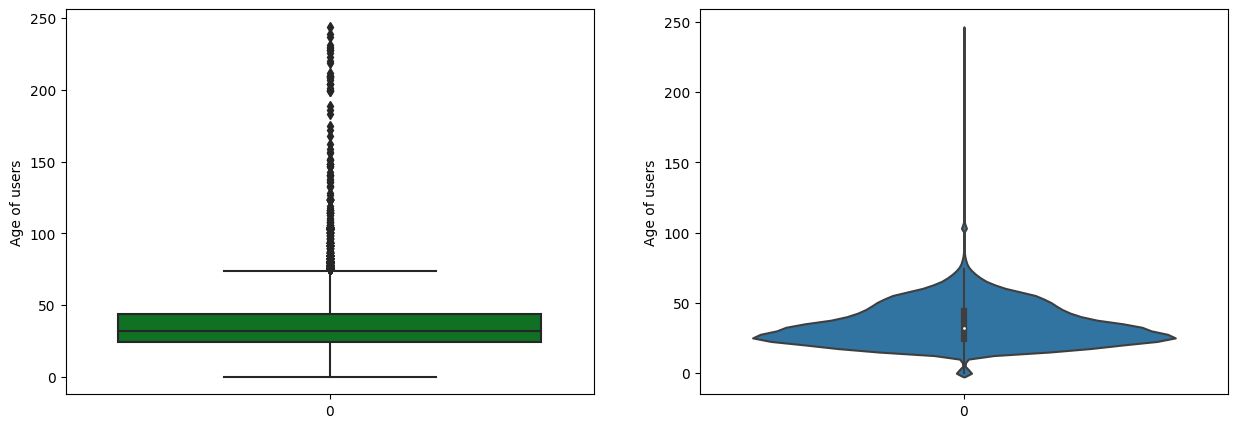

In [ ]:
#boxplot of age of users
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(users['Age'], color= (0, 0.5, 0.1))
plt.ylabel('Age of users')


#violinplot of age of users
plt.subplot(1,2,2)
sns.violinplot(users['Age'])
plt.ylabel('Age of users')
plt.show()




*   Most of the data is distributed around 20 and 50, which imdicates most of the users are from this age group.
*   Data shows people of age group more than 200 years are also present, which is not possible and it is outliers.
*   Let's take readable age of users to be between 5 and 95, so making the outliers in the dataset to be between these two values.  



In [ ]:
# Replacing age below 5 and above 95 by Nan
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

In [ ]:
#Replacing the nan value with mean value of age
users['Age'].fillna(users['Age'].mean(), inplace=True)

<Axes: xlabel='Age'>

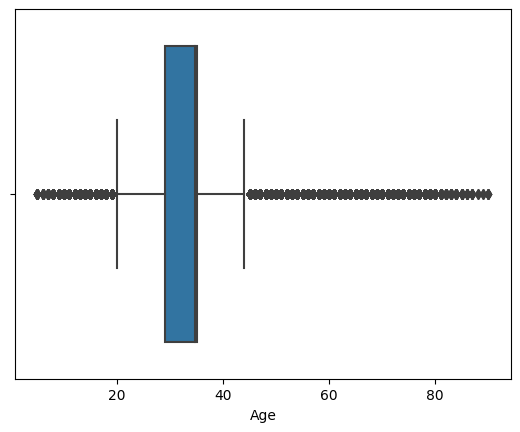

In [ ]:
sns.boxplot(x='Age', data=users)

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Location :

In [ ]:
users['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [ ]:
users['Country'] = users['Location'].str.extract(r',\s?(\w*\s?\w*)$')

In [ ]:
set(users['Country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'algérie',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn würtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedà',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c

In [ ]:
#Correcting the country names
users['Country'].replace(['srilanka','_ brasil','brasil','geermany','germay','indiai','isreal','la argentina','rosario','la france','le madagascar','malaysian',
                          'mauritania','moçambique','saudia arabia','swazilandia','thailoand','turkei','türkiye','ua','ukrain','urugua','algérie','burkinafasu',
                          'hongkong'],
                         ['sri lanka','brazil','brazil','germany','germany','india','israel','argentina','argentina','france','madagascar','malaysia',
                          'mauritius','mozambique','saudi arabia','swaziland','thailand','turkey','turkey','uae','ukraine','uruguay','algeria','burkina faso',
                          'hong kong'], inplace=True)

users.loc[users['Country'].isin(['australii','autralia','austbritania','western australia']), 'Country'] = 'australia'
users.loc[users['Country'].isin([ 'nederlands','holland','netherlands antilles','neverland','the netherlands']), 'Country'] = 'netherlands'
users.loc[users['Country'].isin([ 'catalonia','catalunya','catalunya spain','españa''madrid']), 'Country'] = 'spain'
users.loc[users['Country'].isin([ 'le canada','canda','cananda','canada eh','can']), 'Country'] = 'canada'
users.loc[users['Country'].isin(['cn', 'cnina',' china öð¹ú','chinaöð¹ú','chian']), 'Country'] = 'china'
users.loc[users['Country'].isin([ 'rsa','russian federation']), 'Country'] = 'russia'
users.loc[users['Country'].isin([ 'newzealand','nz']), 'Country'] = 'new zealand'
users.loc[users['Country'].isin([ 'italia','italien','itlay']), 'Country'] = 'italy'
users.loc[users['Country'].isin(['the philippines', 'philippine','philippines', 'philippinies', 'phillipines', 'phils', 'phippines','phila'
                                ]), 'Country'] = 'philippines'


users.loc[users['Country'].isin(['england','england uk','english','new london','united kindgdom', 'united kindgonm','united kingdom','u k']), 'Country'] = 'uk'
users.loc[users['Country'].isin(['america','american samoa','unite states','united sates','united staes','united state','united statea','united stated',
                                'united stated of america','united states','united states of america','us','usa','uusa','us of a','us virgin islands',
                                'usa  canada','usa currently living in england','usaa','ysa','wonderful usa','california','oakland','nyc','richmond country',
                                'carter','hernando', 'van wert'  ]), 'Country'] = 'usa'

users.loc[users['Country'].isin(['','01776','02458','19104','23232','30064','85021','87510','adsgfdr','a','aaa','adsgfdr','az','bbbzzzzz','bfe','bih','bkk',
                               'c','cadd0','dfg','de','diy','gb','id','k1c7b1','l','lake','lee','lj','lkjlj','nh','nl','no more','none','pa','rmi','somewherein space',
                                'tdzimi','the','thing','ussurfing','unknown','vorce','x','xinyu','xxxxxx','z','öð¹ú','n/a','pr',
                               np.nan, ]), 'Country'] = 'others'

In [ ]:
users.Country.value_counts()

usa            139748
canada          21664
uk              18580
germany         17045
spain           13170
                ...  
osceola             1
lornsenland         1
dublin              1
myanmar             1
la svizzera         1
Name: Country, Length: 395, dtype: int64

In [ ]:
#dropping 'Location' column
users.drop(['Location'], axis=1, inplace=True )

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User-ID  278858 non-null  int64  
 1   Age      278858 non-null  float64
 2   Country  278858 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


###3.4.MERGING DATASETS

In [ ]:
#Merging Explicitly_rated and users datasets
books_df = pd.merge(books, explicitly_rated,  on='ISBN', how='inner')
#Merging the resulant dataset with books dataset
books_df = pd.merge(books_df, users, on='User-ID', how='inner')

In [ ]:
books_df.sample(5)

,ISBN,Title,Author,Year,Publisher,User-ID,Book-Rating,Age,Country
320328,0451201523,"Trick or Treachery: A Murder, She Wrote Myster...",Jessica Fletcher,2000,New American Library,268035,7,34.72384,others
189134,1573226122,Lord of the Flies,William Golding,1997,Riverhead Books,23872,7,22.00000,usa
367095,0671744615,LEGEND,Jude Deveraux,1996,Atria,109124,10,37.00000,usa
156473,0893750778,Mystery of the Runaway Sled (Troll Easy-To-Rea...,Erica Frost,1979,Troll Communications,185233,5,31.00000,usa
294352,0582364108,"A Time to Kill (Penguin Readers, Level 5)",John Grisham,2000,Pearson ESL,178107,10,21.00000,germany


In [ ]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383842 entries, 0 to 383841
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ISBN         383842 non-null  object 
 1   Title        383842 non-null  object 
 2   Author       383842 non-null  object 
 3   Year         383842 non-null  int64  
 4   Publisher    383842 non-null  object 
 5   User-ID      383842 non-null  int64  
 6   Book-Rating  383842 non-null  int64  
 7   Age          383842 non-null  float64
 8   Country      383842 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 29.3+ MB


In [ ]:
books_df.duplicated().sum()

0

## ***4. Data Vizualization & Storytelling with charts :***

####1.Most rating given to books.

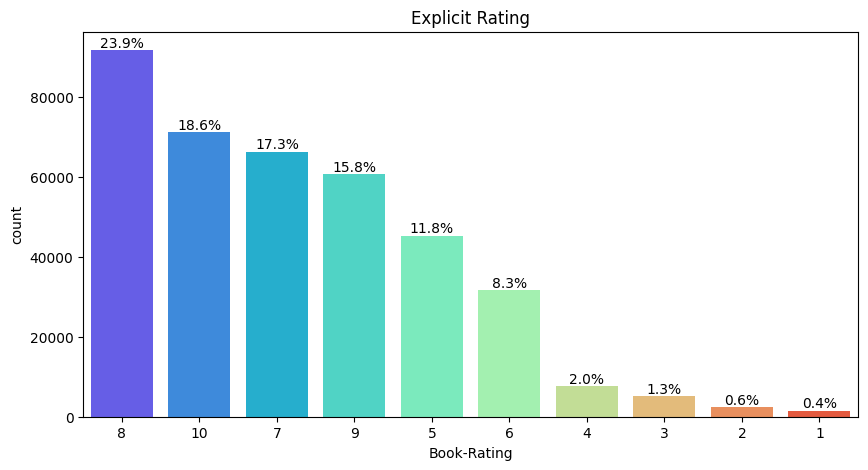

In [ ]:
#Rating of books
plt.figure(figsize=(10,5))
fig_1 = sns.countplot(x='Book-Rating', data=books_df, palette='rainbow', order=books_df['Book-Rating'].value_counts().index)
plt.title('Explicit Rating')


# Add percentage values
total = len(books_df['Book-Rating'])
for p in fig_1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    fig_1.annotate(percentage, (x, y), ha='center', va='bottom')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Count plots display the number of occurrences of each category in a dataset. They are particularly useful for understanding the frequency or proportion of different categories within a variable.

##### 2. What is/are the insight(s) found from the chart?

*  Rating is given from a scale of 1 to 10.

*  Among Explicitly rated books, 8 rated books are more in number followed by 10 rated books.
*  Books with rating 1 is the least in number.




####2.Most popular Authors.

In [ ]:
#Total number of Authors.
books_df['Author'].nunique()

62113

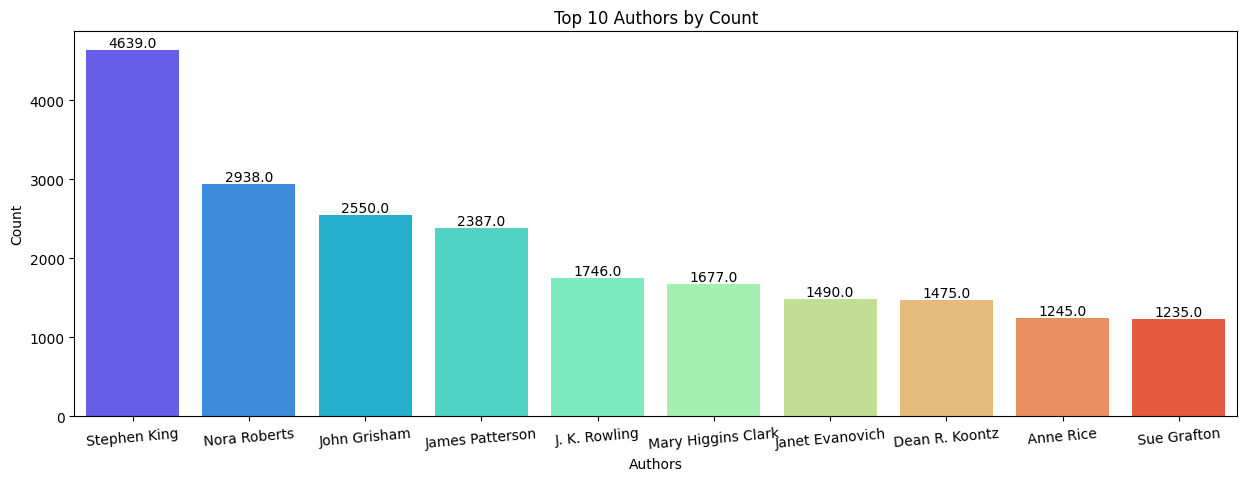

In [ ]:
#Most popular authors
authors = books_df['Author'].value_counts().reset_index()[:10]
plt.figure(figsize=(15,5))
fig_2 = sns.barplot(x='index', y='Author', data=authors, palette='rainbow')

for p in fig_2.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    fig_2.annotate(count, (x, y), ha='center', va='bottom')

plt.title('Top 10 Authors by Count')
plt.xlabel('Authors')
plt.xticks(rotation=5)
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

We use bar plots in seaborn to compare and visualize the relationship between a categorical variable and a numerical variable.Seaborn provides various options for customizing bar plots, such as changing the color palette, adding annotations etc, making it easier to create visually appealing and informative

##### 2. What is/are the insight(s) found from the chart?



*   Among all the Authors "Stephen King" is the most popular with 4639 number of books.
*   This bar plot shows us that books of which author is most availabe in the platform.



####3.Most Purchased Books - Using Interactive Plots

In [ ]:
# Importing required library
import plotly.graph_objects as pgo

In [ ]:
#most purchased books
pur = books_df['Title'].value_counts().reset_index()[:15]
#Ploting the same with plotly
fig_3 = pgo.Figure(data = [pgo.Bar(y=pur['index'], x=pur['Title'], orientation='h', marker=dict(color='teal'))])

#add title
fig_3.update_layout(
    title_text='Most Purchased Books',
    title_x=0.5
)
fig_3.show()

##### 1. Why did you pick the specific chart?

Bar plots in Plotly are interactive and customizable. They are used to compare the relationship between a categorical variable and a numerical variable.When we hover over the bar it shows the corresponding values and makes it easy to compare the chart.

##### 2. What is/are the insight(s) found from the chart?

* 'The Lovely Bones: A Novel' is the most purchased book.
* Novel is the most popular genre followed by Thriller and Fantasy.

####4.Country with most Active Users - Using WordCloud

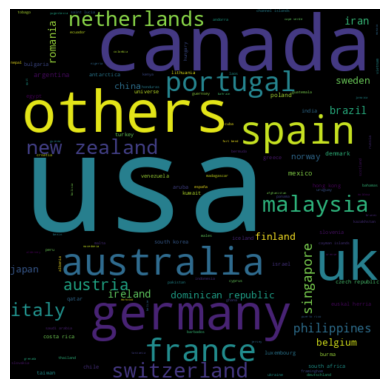

In [ ]:
from collections import Counter
from wordcloud import WordCloud


# Create a list of word
text = books_df['Country'].tolist()

# Create a Counter object to count the frequency of each word
word_counts = Counter(text)

# Create the wordcloud object
wordcloud = WordCloud(width=500, height=500, margin=0).generate_from_frequencies(word_counts)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

##### 1. Why did you pick the specific chart?

Word clouds are used to visually represent the most frequently occurring words in a text corpus. They are particularly useful for gaining a quick understanding of the most common or prominent words in a dataset.

##### 2. What is/are the insight(s) found from the chart?



*   Most number of users are from USA followed by Canada, UK, Spain, Germany etc.




####5.Book Publishers.

In [ ]:
#publishers
publishers = books_df['Publisher'].value_counts().sort_values(ascending=False)
top_publishers = publishers.head(20)

#plot interactive pie plot using plotly
fig_5 = pgo.Figure(data=[pgo.Pie( labels=top_publishers.index, values=top_publishers.values, hole=0.5)])
fig_5.update_layout(
    title_text = "Top 20 Publishers",
    title_x = 0.5,
    #figure size
    width=800,
    height=600

)
fig_5.show()

##### 1. Why did you pick the specific chart?

Plotly provides interactive and customizable charts. Pie chart are effective in visualizing the data with categories and their values. Pie chart makes it easy to understand the large and small portions of the data.

##### 2. What is/are the insight(s) found from the chart?

* Among all the Publishers "Brilliant Books" are the most popular publisher.
* They contributes to a number of 12,781 books, and they are most wanted by the users. Among the top 20 publishers "Brilliant Books" contributes to 10.3% of books.
* Other most wanted publishers are "Pocket" and "Berkley Publishing Group".

####6.Books Published over the Years.

In [ ]:
#number of books published over the years
yearbook = books_df['Year'].value_counts().sort_index()[1:]
yearbook

1900        1
1901        4
1902        3
1904        1
1906        1
        ...  
2004    10097
2005       52
2006        4
2010        3
2011        1
Name: Year, Length: 94, dtype: int64

In [ ]:
#plot using plotly
fig_6 = pgo.Figure(data = [pgo.Bar(x=yearbook.index, y=yearbook.values)])
fig_6.update_layout(
    title_text = "Number of Books Published per Year",
    title_x = 0.5,
    xaxis_title = "Year"
)
fig_6.show()

##### 1. Why did you pick the specific chart?

Bar plots in Plotly are interactive and customizable. They are used to compare the relationship between a categorical variable and a numerical variable.When we hover over the bar it shows the corresponding values and makes it easy to compare the chart.

##### 2. What is/are the insight(s) found from the chart?

* After the year 1980 we can see that their is a gradual increase in the number of books published.
* 2002 was the year in which the most number of books where published followed by year 2001.
* We can see after 1990 the publishing industry become more busy as the number of book consumers increased.

####7.Most preferred Books by different age groups.

In [ ]:
def age_group(age):
  '''
  defines the age group of users
  '''
  if age<13:
    x='Children'
  elif age>=13 and age<25:
    x='Youth'
  elif age>=25 and age<40:
    x='Adult'
  elif age>=40 and age<60:
    x='Middle Age'
  else:
    x='Senior Citizen'
  return x

In [ ]:
books_df['Age_group']=books_df['Age'].apply(lambda x: age_group(x))

In [ ]:
#find the count of different age groups
books_df['Age_group'].value_counts()

Adult             244701
Middle Age         87486
Youth              38978
Senior Citizen     11264
Children            1413
Name: Age_group, dtype: int64

In [ ]:
#Book preferred by Adult
age=books_df.loc[books_df['Age_group']=='Adult'].groupby(['Title']).agg(No_of_users=('User-ID','nunique'),total_rating=('Book-Rating','sum')).reset_index()
age.sort_values(by='No_of_users',ascending=False,inplace=True)
#sns.barplot(x='No_of_users',y='Title',palette='Paired',data=age.head(10))


# Create the bar plot
fig = pgo.Figure(data=[pgo.Bar(
    x=age['No_of_users'].head(10),  # x-axis data
    y=age['Title'].head(10),  # y-axis data
    orientation='h',  # horizontal orientation
    marker=dict(color='sienna')  # color of the bars
)])

# Set the title and axis labels
fig.update_layout(
    title='Top 10 Books Preferred by Adult',
    title_x = 0.5,
    xaxis=dict(title='Number of Users'),
    yaxis=dict(title='Title')
)

# Show the plot
fig.show()

In [ ]:
#Books Preferred by youth

age=books_df.loc[books_df['Age_group']=='Youth'].groupby(['Title']).agg(No_of_users=('User-ID','nunique'),total_rating=('Book-Rating','sum')).reset_index()
age.sort_values(by='No_of_users',ascending=False,inplace=True)
#sns.barplot(x='No_of_users',y='Title',palette='Paired',data=age.head(10))

# Create the bar plot
fig = pgo.Figure(data=[pgo.Bar(
    x=age['No_of_users'].head(10),  # x-axis data
    y=age['Title'].head(10),  # y-axis data
    orientation='h',  # horizontal orientation
    marker=dict(color='peru')  # color of the bars
)])

# Set the title and axis labels
fig.update_layout(
    title='Top 10 Books Preferred by Youth',
    title_x = 0.5,
    xaxis=dict(title='Number of Users'),
    yaxis=dict(title='Title')
)

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

Bar plots in Plotly are interactive and customizable. They are used to compare the relationship between a categorical variable and a numerical variable.When we hover over the bar it shows the corresponding values and makes it easy to compare the chart.

##### 2. What is/are the insight(s) found from the chart?

* Among all the age groups "Adults" are more into reading books followed by "Middle age" and "Youth".
* When we see the genre wise distribution we can see that Adults are more into Novels and Thrillers.
* But in case of Youth they like Fantacy and Novels.

####8.Most Books Sold Among Implicitly Rated

In [ ]:
#most books sold among implicitly rated books
implicitly_rated.head(1)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0


In [ ]:
#merging implicitly rated and books dataset
temp = pd.merge(implicitly_rated, books , on="ISBN", how='inner')
temp.sample(1)

,User-ID,ISBN,Book-Rating,Title,Author,Year,Publisher
419218,127429,0743204700,0,An Accidental Woman : A Novel,Barbara Delinsky,2002,Simon &amp; Schuster


In [ ]:
#Find which is the most wanted book among implicitly rated books
famous = temp['Title'].value_counts().sort_values(ascending=False)[:15]
famous

Wild Animus                                        1921
The Lovely Bones: A Novel                           588
A Painted House                                     472
Bridget Jones's Diary                               438
The Nanny Diaries: A Novel                          435
Divine Secrets of the Ya-Ya Sisterhood: A Novel     417
The Da Vinci Code                                   404
Snow Falling on Cedars                              387
The Pelican Brief                                   383
The Secret Life of Bees                             368
Angels &amp; Demons                                 360
The Notebook                                        357
The Testament                                       356
The Joy Luck Club                                   347
The Summons                                         346
Name: Title, dtype: int64

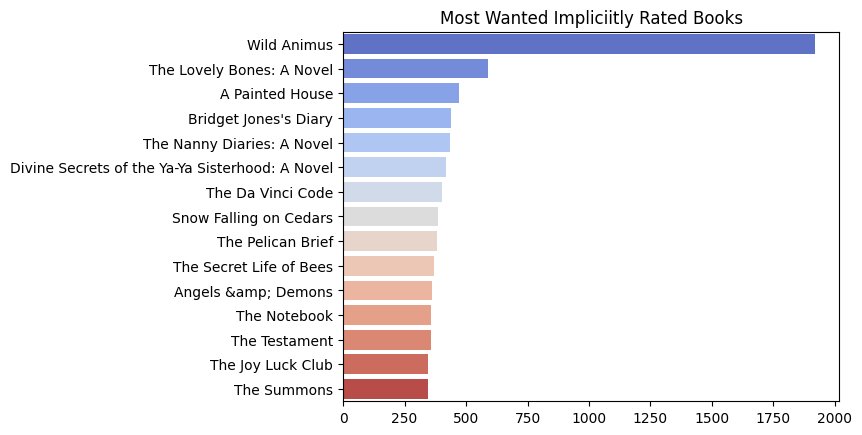

In [ ]:
#plot famous using sns
fig_9 = sns.barplot(y=famous.index, x=famous.values, palette='coolwarm')
fig_9.set_title('Most Wanted Impliciitly Rated Books')
plt.show()

##### 1. Why did you pick the specific chart?

 Bar plots are used when you want to compare the distribution or frequency of different categories. They allow you to easily see the differences between groups and identify patterns or trends.

##### 2. What is/are the insight(s) found from the chart?

* Among the Implicitly rated books "Wild Animus" is the most purchased book.

##**EDA CONCLUSION**

*   Novel is the most popular genre followed by Thriller and Fantasy.
*   Among the Implicitly rated books "Wild Animus" is the most purchased book.
*   'The Lovely Bones: A Novel' is the most purchased book among Explicitly rated category.
*   Books by author Stephen King is the most purchased by the users.
*   Most number of users are from USA and Canada.
*   Most readers in this platform are of age group between 25 and 40.
*   Brilliant Books and Pocket are the top most publishers of books among the Explicitly rated books category.
*   2002 was the year in which most number of books where published followed by year 2001.




## ***5. Data Pre-processing & ML Model Implementation***

In [ ]:
books_df.sample(1)

,ISBN,Title,Author,Year,Publisher,User-ID,Book-Rating,Age,Country,Age_group
193191,0451208498,Thieves' Paradise,Eric Jerome Dickey,2003,Signet Book,25409,8,31.0,usa,Adult


In [ ]:
#Creating a copy of the books_df dataframe
books_copy = books_df.copy()

###****1.Popularity Based Recommender****

This is a type of recommendation system that suggests items to users based on their overall popularity or popularity among a large group of users. It assumes that popular items are more likely to be of interest to users.

Here we consider popularity on the basis of Average Rating and we considered them over -
*   All books
*   Authors
*   Publishers

We create a dropdown list also for Authors and Publishers so that it will be easier for the users to choose the books.


####1.TOP 50 Recommendation -Popular Books

In [ ]:
#getting number of rating for each books
num_rat = books_copy.groupby('Title').count()['Book-Rating'].reset_index()
num_rat.rename(columns = {'Book-Rating': 'number_of_rating'}, inplace=True)
num_rat.head(5)

,Title,number_of_rating
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2


In [ ]:
#average rating for each books
avg_rat = books_copy.groupby('Title').mean()['Book-Rating'].reset_index()
avg_rat.rename(columns = {'Book-Rating': 'average_rating'}, inplace=True)
avg_rat.head(5)

<ipython-input-104-dc992ae9ed3d>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Title,average_rating
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000


In [ ]:
#merging both
popular_df = num_rat.merge(avg_rat, on='Title')
popular_df.head(5)

,Title,number_of_rating,average_rating
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000


In [ ]:
#Creating a dataframe for recommendation.
popular_df = popular_df.merge(books_copy[['Title','Author','Publisher']], on='Title')
popular_df.sample(5)

,Title,number_of_rating,average_rating,Author,Publisher
159406,Last Man Down: A New York City Fire Chief and ...,3,10.000000,Richard Picciotto,Berkley Publishing Group
73085,Dead Ringer,21,6.666667,Jasmine Cresswell,Mira Books
318193,The Pacific War: The Story of the Bitter Strug...,1,7.000000,Bernard C. Nalty,Combined Publishing
189238,Mutant Message Down Under,51,7.411765,Marlo Morgan,Harpercollins
149477,Jezebels Tochter. Criminal- Roman.,1,7.000000,Wilkie Collins,Dtv


In [ ]:
#Considering only those books that is rated by atleast 200 users
popular_200_rated = popular_df[popular_df['number_of_rating'] >= 200]
#Recommending top 20 books based on average rating
popular_20 = popular_200_rated.drop_duplicates(subset="Title").sort_values(by="average_rating",ascending=False).head(20)
popular_20

,Title,number_of_rating,average_rating,Author,Publisher
124291,Harry Potter and the Goblet of Fire (Book 4),247,9.125506,J. K. Rowling,Scholastic
124543,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393,J. K. Rowling,Scholastic
124767,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,J. K. Rowling,Scholastic
352604,To Kill a Mockingbird,267,8.977528,Harper Lee,Perennial Classics
125239,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,J. K. Rowling,Arthur A. Levine Books
289527,The Fellowship of the Ring (The Lord of the Ri...,205,8.882927,J. R. R. Tolkien,Houghton Mifflin Company
123933,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491,J. K. Rowling,Scholastic
357491,"Tuesdays with Morrie: An Old Man, a Young Man,...",250,8.588000,MITCH ALBOM,Doubleday
99097,Fahrenheit 451,204,8.549020,Ray Bradbury,Del Rey Books
329861,The Secret Life of Bees,406,8.477833,Sue Monk Kidd,Viking Books


####2.Book Recommendation Based on Authors

In [ ]:
#Taking only those books that was rated by atleast 50 Users
popular_50_rated = popular_df[popular_df['number_of_rating'] >= 50]

In [ ]:
def books_by_authors(x):
  y = popular_50_rated[popular_50_rated['Author'] == x][['Title','average_rating']]
  y = y.drop_duplicates(subset="Title").sort_values(by='average_rating', ascending = False)
  return y.head(10)

In [ ]:
#Recommending Best Books by Authors.
books_by_authors('James Patterson')

,Title,average_rating
108641,Four Blind Mice,8.182692
228367,Roses Are Red (Alex Cross Novels),8.117647
20466,Along Came a Spider (Alex Cross Novels),8.042373
51884,Cat &amp; Mouse (Alex Cross Novels),8.000000
269646,The Big Bad Wolf: A Novel,7.851852
147438,Jack &amp; Jill (Alex Cross Novels),7.838235
154242,Kiss the Girls,7.784946
1607,2nd Chance,7.760000
1003,1st to Die: A Novel,7.711864
268052,The Beach House,7.703704


In [ ]:
#Checking
#finding the books of dan brown
books_by_author = books_copy[books_copy['Author'] == "Dan Brown"]
books_by_author.drop_duplicates(subset="Title")

,ISBN,Title,Author,Year,Publisher,User-ID,Book-Rating,Age,Country,Age_group
62,0671027387,Deception Point,Dan Brown,2002,Pocket,11676,10,34.72384,others,Adult
64,0743486226,Angels &amp; Demons,Dan Brown,2003,Atria,11676,8,34.72384,others,Adult
89,0312995423,Digital Fortress : A Thriller,Dan Brown,2003,St. Martin's Press,11676,7,34.72384,others,Adult
160,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,11676,9,34.72384,others,Adult
1556,3404148665,Illuminati.,Dan Brown,2003,LÃ?Â¼bbe,11676,10,34.72384,others,Adult
74155,031218087X,Digital Fortress,Dan Brown,1998,Thomas Dunne Books,240144,8,34.00000,usa,Adult
99535,8495618605,El Codigo Da Vinci / The Da Vinci Code,Dan Brown,2003,Ediciones Urano,151420,9,22.00000,spain,Youth
175097,0552150738,Angels and Demons,Dan Brown,2003,Corgi Adult,224528,9,32.00000,uk,Adult


To access the Author, we create a dropdown so that it is easy for the user to select the Author name.

In [ ]:
#For interactive Plots
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [ ]:
#Creating a Dropdown to access the Author names.
@interact
def book_by_author(author_name = list(popular_50_rated['Author'].value_counts().index)):
  y = popular_50_rated[popular_50_rated['Author'] == author_name][['Title','average_rating']]
  y = y.drop_duplicates(subset="Title").sort_values(by='average_rating', ascending = False)
  return y.head(10)


interactive(children=(Dropdown(description='author_name', options=('Stephen King', 'John Grisham', 'James Patt…

####3.Book Recommendation Based On Publishers.

In [ ]:
#Recommendation based on publisher
def books_by_publishers(x):
  y = popular_50_rated[popular_50_rated['Publisher'] == x][['Title','average_rating']]
  y = y.drop_duplicates(subset="Title").sort_values(by='average_rating', ascending = False)
  return y.head(10)

In [ ]:
books_by_publishers('Pocket')

,Title,average_rating
278774,The Color Purple,8.586207
298537,The Hitchhiker's Guide to the Galaxy,8.529412
296168,The Green Mile,8.526316
331452,The Shining,8.319444
358708,Two for the Dough,8.258929
346101,The World According to Garp,8.166667
201064,On Writing,8.164384
270838,The Blue Nowhere : A Novel,8.148649
215977,Pretend You Don't See Her,8.025000
313659,The Mulberry Tree,8.000000


In [ ]:
#Creating a Dropdown for Publishers.
@interact
def book_by_publisher(publisher_name = list(popular_50_rated['Publisher'].value_counts().index)):
  y = popular_50_rated[popular_50_rated['Publisher'] == publisher_name][['Title','average_rating']]
  y = y.drop_duplicates(subset="Title").sort_values(by='average_rating', ascending = False)
  return y.head(10)

interactive(children=(Dropdown(description='publisher_name', options=('Ballantine Books', 'Warner Books', 'Poc…

###**Collaborative Filtering**

###**Memory Based Approach**

Collaborative filtering is a popular technique used in recommendation systems to provide personalized recommendations to users.

*  In memory-based collaborative filtering, recommendations are generated by identifying similar users or items based on their past behavior or preferences. We assume that users who have similar tastes or preferences in the past are likely to have similar tastes in the future.

*  We use different models to cluster the similar users or items, and then recommend items to the users based on their preferences.

**Data Preprocessing**

In [ ]:
print(books.shape)
print(ratings.shape)

(271360, 5)
(1149780, 3)


In [ ]:
#Users who has rated the books
ratings['User-ID'].value_counts().shape

(105283,)

In [ ]:
#we take those users who has rated more than 100 books
x = ratings['User-ID'].value_counts() > 100
x[x].shape

(1825,)

In [ ]:
#Taking the index of those users and storing it in y
y = x[x].index
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            238186,  99441, 187410, 262070,  70183,  40553,  39345, 266283,
            189666, 140879],
           dtype='int64', length=1825)

In [ ]:
#we take those users who has rated more than 100 books from ratings dataframe
#Create new dataframe with these users
rated_100_users = ratings[ratings['User-ID'].isin(y)]
rated_100_users.sample(5)

,User-ID,ISBN,Book-Rating
861613,208410,0099285231,0
19776,3757,8422645327,7
690628,168064,0749386517,0
621320,150498,0425120015,0
1020305,244662,0142001740,10


In [ ]:
rated_100_users.shape

(656605, 3)

In [ ]:
#merging the dataframe with books dataset
active_users = rated_100_users.merge(books, on='ISBN', )
active_users.sample(3)


,User-ID,ISBN,Book-Rating,Title,Author,Year,Publisher
482942,104399,0743418948,0,"Door to Alternity: The Unseen Trilogy, Book 2 ...",Nancy Holder,2001,Simon Spotlight Entertainment
465228,94347,067152903X,8,The DANGEROUS LIVES OF ALTAR BOYS : THE DANGER...,Chris Fuhrman,1996,Washington Square Press
8366,133689,0440173922,0,The Ring,Danielle Steel,1983,Dell


In [ ]:
print(active_users.shape)

(604854, 7)


In [ ]:
#Calculating the number of ratings each book has got
num_rating = active_users.groupby('Title')['Book-Rating'].count().reset_index()
num_rating.rename(columns={'Book-Rating' : 'num_of_ratings'}, inplace=True)
num_rating.sample(5)

,Title,num_of_ratings
26223,Cherokee Warriors: The Lover (Cherokee Warriors),3
17582,Betty White's Pet-Love: How Pets Take Care of Us,2
147084,"The Legend of Sleepy Hollow: And, Rip Van Winkle",6
90401,Mister Posterior and the Genius Child,17
160638,The Village by the Sea: An Indian Family Story,3


In [ ]:
#merging "num_of_ratings" with active users dataset
active_users = active_users.merge(num_rating, on='Title')
active_users.sample(5)

,User-ID,ISBN,Book-Rating,Title,Author,Year,Publisher,num_of_ratings
210918,263877,0440175623,0,Random Winds,Belva Plain,1987,Dell,32
568527,198711,0553266144,0,"The Popularity Plan (Sweet Dreams, No 2)",Rosemary Vernon,1984,Starfire,1
442062,75115,3442446759,7,Lords und Ladies. Ein Roman von der bizarren S...,Terry Pratchett,2000,Goldmann,6
469881,86243,0140434356,0,"Felix Holt, the Radical (Penguin Classics)",George Eliot,1995,Penguin Books,2
574792,209875,0938935186,0,Aristotle: Greece 384-322 B.C. (Audio Classics...,Charlton Heston,1990,Knowledge Products,1


In [ ]:
#Taking only those books which has more than 50 number of ratings
final_df = active_users[active_users['num_of_ratings'] >= 50]
final_df.sample(5)

,User-ID,ISBN,Book-Rating,Title,Author,Year,Publisher,num_of_ratings
69643,198711,0895772116,0,Call of the Wild,Jack London,1985,Random House Childrens Books,112
53163,99955,0446605239,4,The Notebook,Nicholas Sparks,1998,Warner Books,310
81875,185233,0373484224,0,Stanislaski Brothers (Silhouette Promo),Nora Roberts,2000,Silhouette,68
125877,122793,0316899984,0,"River, Cross My Heart",Breena Clarke,1999,Little Brown &amp; Company,102
80220,11601,0553583441,0,Touching Evil,Kay Hooper,2001,Bantam Books,65


In [ ]:
final_df.shape

(100426, 8)

In [ ]:
#Drop duplicates
final_df.drop_duplicates(['User-ID', 'Title'], inplace=True)
final_df.shape

<ipython-input-131-ce0668c374e8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(97962, 8)

In [ ]:
final_df.shape

(97962, 8)

**Creating a Pivot Table**

In [ ]:
#create a pivot table and filling the nan values with 0.
final_df_pivot = final_df.pivot_table(columns='User-ID', index='Title', values = 'Book-Rating').fillna(0)
final_df_pivot

User-ID,183,254,507,882,1424,1435,1733,1903,2033,2110,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Creating a Sparse Matrix**

In [ ]:
#Sparse matrix
from scipy.sparse import csr_matrix
fb_sparse = csr_matrix(final_df_pivot)

In [ ]:
#This will only consider non zero values in the sparse matrix to calculate the distance
type(fb_sparse)

scipy.sparse._csr.csr_matrix

####1.Model : Nearest Neighbors

In [ ]:
#Model_1
from sklearn.neighbors import NearestNeighbors
model_1 = NearestNeighbors( algorithm= 'brute', metric='cosine')

In [ ]:
#Train the model
model_1.fit(fb_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
#finding the index of the book
index = np.where(final_df_pivot.index=='A Bend in the Road')[0][0]
index

10

In [ ]:
#Finding the distance and the index of the books
distances, suggestions = model_1.kneighbors(final_df_pivot.iloc[0, :].values.reshape(1, -1), n_neighbors=6)

In [ ]:
distances
#This will find the distance of similar books from the given book

array([[0.        , 0.77246943, 0.78338204, 0.82125183, 0.82260954,
        0.82555014]])

In [ ]:
suggestions
#This will give you the index of those similar books

array([[   0,   76,  130, 1013,  677,  847]])

In [ ]:
#To get the Book by their names
for i in range(len(suggestions)):
  print(final_df_pivot.index[suggestions[i]])

Index(['1984', 'Animal Farm', 'Brave New World', 'Timeline',
       'Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death',
       'The Handmaid's Tale'],
      dtype='object', name='Title')


In [ ]:
#Creating a Recommender
def book_recommender(book_name):
  book_index = np.where(final_df_pivot.index == book_name)[0][0]
  distances, suggestions = model_1.kneighbors(final_df_pivot.iloc[book_index, :].values.reshape(1, -1), n_neighbors=6)

  for i in suggestions:
      print(final_df_pivot.index[i])


In [ ]:
book_recommender('Harry Potter and the Chamber of Secrets (Book 2)')

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)',
       'Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))',
       'Harry Potter and the Order of the Phoenix (Book 5)'],
      dtype='object', name='Title')


In [ ]:
book_recommender('The Notebook')

Index(['The Notebook', 'Nights in Rodanthe', 'A Walk to Remember',
       'The Rescue', 'Message in a Bottle',
       'The Five People You Meet in Heaven'],
      dtype='object', name='Title')


In [ ]:
#To get the book names
book_names = final_df_pivot.index.tolist()

In [ ]:
#for interactive recommender
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [ ]:
#creating a dropdown widget
@interact
def recommeder (book_name = list(book_names)):
  book_index = np.where(final_df_pivot.index == book_name)[0][0]
  distances, suggestions = model_1.kneighbors(final_df_pivot.iloc[book_index, :].values.reshape(1, -1), n_neighbors=6)

  for i in suggestions:
      print(final_df_pivot.index[i])


interactive(children=(Dropdown(description='book_name', options=('1984', '1st to Die: A Novel', '2010: Odyssey…

####2.Model : KMeans

**Vectorizing the Title**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Load the dataset
df = final_df
# Drop any rows with missing data
df.dropna(inplace=True)
# Separate the book titles into a separate series
#titles = df["Title"]

<ipython-input-150-a58bfa6e6d8c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Use the TfidfVectorizer class to transform the book titles into a matrix of numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Title'])

**Elbow method**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Initialize an empty list to store the sum of squared distances
sse = []

# Try different values of k
for k in range(1, 15):
    # Fit the k-means model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(fb_sparse)

    # Append the sum of squared distances to the list
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



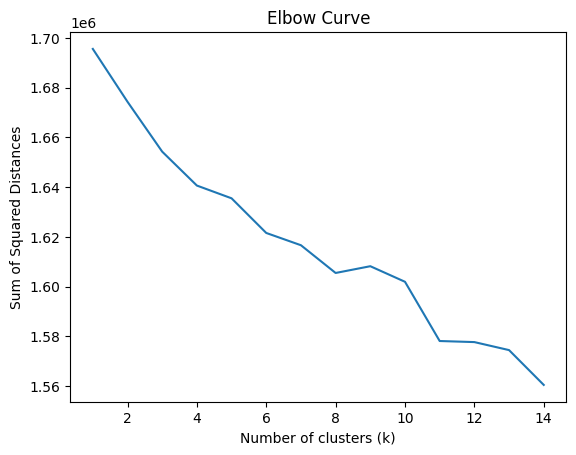

In [ ]:
# Plot the elbow curve
plt.plot(range(1, 15), sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Curve')
plt.show()

**Silhouette Method**

In [ ]:
from sklearn.metrics import silhouette_score
# Define the range of k values you want to try
k_values = range(5, 15)

In [ ]:
# Initialize variables to store the best k value and its corresponding silhouette score
best_k = 0
best_score = -1

# Iterate over each k value
for k in k_values:
    # Create a KMeans instance with the current k value
    kmeans = KMeans(n_clusters=k)
    # Fit the model to the data
    kmeans.fit(fb_sparse)

    # Predict the cluster labels for the data
    labels = kmeans.predict(fb_sparse)
    # Calculate the silhouette score for the current k value
    score = silhouette_score(fb_sparse, labels)

    # Check if the current score is better than the previous best score
    if score > best_score:
        best_score = score
        best_k = k


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
# Print the best k value and its corresponding silhouette score
print("Best k value:", best_k)
print("Silhouette score:", best_score)

Best k value: 6
Silhouette score: 0.12700829764254437


**Model Implementation**

In [ ]:

kmeans = KMeans(n_clusters=best_k, random_state=0)

# Fit the Algorithm
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=6, random_state=0)

In [ ]:
"Harry Potter and the Chamber of Secrets"   "The Joy Luck Club"

In [ ]:
#Recommend Similar Books
# Given a book title, find the cluster it belongs to and recommend other books in that cluster

#Assign the new book title to a cluster:
new_title = "Harry Potter and the Chamber of Secrets"
new_X = vectorizer.transform([new_title])
cluster = kmeans.predict(new_X)[0]

#Retrieve the books in the same cluster as the new book title:
cluster_books = df[kmeans.labels_ == cluster]["Title"]
cluster_books.drop_duplicates(inplace=True)

#Create a new DataFrame with the cluster books:
df = pd.DataFrame(cluster_books)
df.head(5)

<ipython-input-160-0229d014a3f0>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Title
4461,The Dogs of Babel (Today Show Book Club #12)
4530,White Oleander : A Novel (Oprah's Book Club)
5999,The Murder Book
9539,Harry Potter and the Chamber of Secrets (Book 2)
9792,Harry Potter and the Prisoner of Azkaban (Book 3)


# **Conclusion**

*  Aim of this project was to build a Book Recommendation System, and we built the recommendation system based on Popularity, Collaborative Filtering and Memory Based Approach.
*  I have started with data analysis for better understand the data. Then I have cleaned the data and prepared them for building the model.

*  I used different models to cluster the similar users and items, and then recommend items to the users based on their preferences.
*  I used KMeans model and Nearest Neighbors model with cosine distance to cluster the similar users and items.
*  Nearest Neighbors Model with cosine similarity gave better results
*  Interactive Dropdowns were made for easy access and as an improvisation to the models.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***